## [실습4] CNN 기반 개와 고양이 이미지 데이터 분류 모델 구현

이번 실습에서는 3장에서 배운 지식을 활용하여 CNN 기반 개와 고양이 이미지 데이터 분류 모델을 구현하고 고도화 해볼 것입니다.

### 0. 라이브러리 불러오기

필요한 Tensorflow 라이브러리를 불러옵니다.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Rescaling, RandomFlip, RandomRotation

import pandas as pd

answer = {}

### 1. 데이터 탐색

Kaggle에 공개된 개 vs 고양이 분류 데이터셋을 활용합니다.

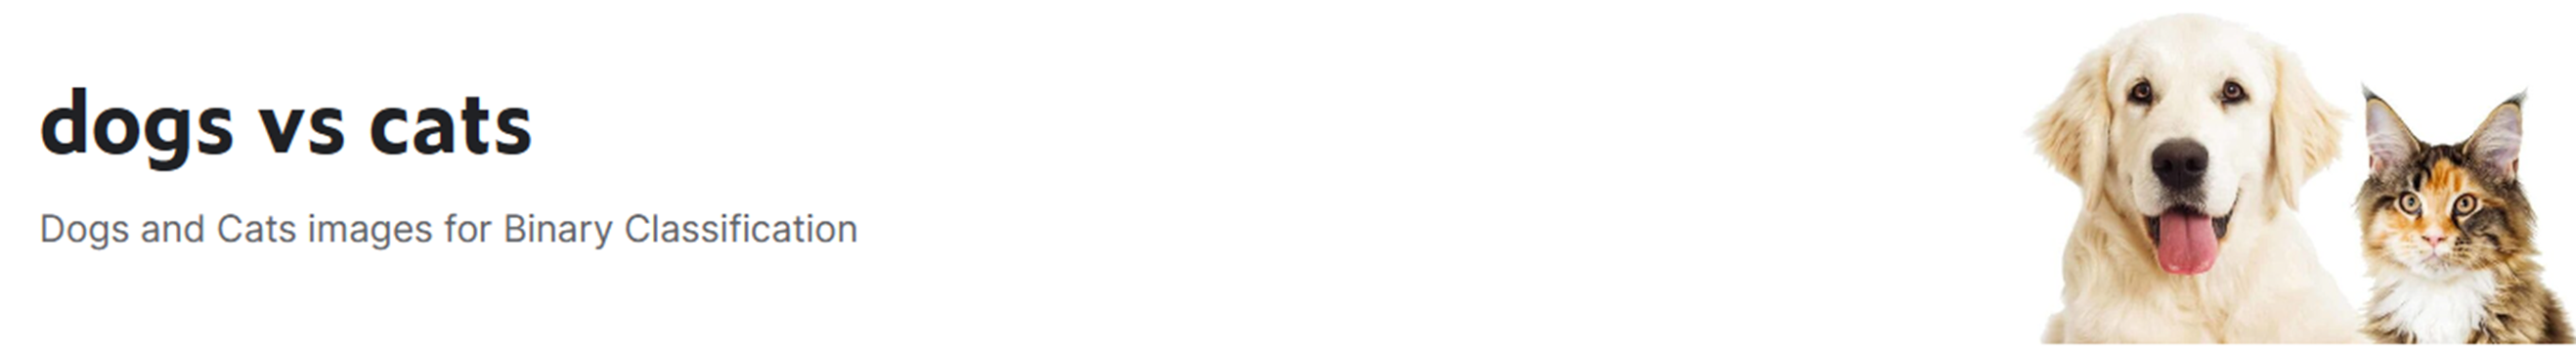
- https://www.kaggle.com/datasets/moazeldsokyx/dogs-vs-cats/data (Public Domain)

전체 데이터셋을 활용하면 시간이 매우 많이 소요되므로, 본 실습에서는 전체 데이터의 10%만 사용하겠습니다.

### 1. TensorFlow Dataset 구성 (10점)

keras.utils.image_dataset_from_directory 함수를 활용해 저장된 이미지 파일로부터 tensorflow Dataset을 생성합니다. <br>

TensorFlow Dataset은 메모리에 상주하는 이미지의 수를 자동으로 조정함으로써 성능 최적화를 이끌어낼 수 있습니다.

In [ ]:
train_data_path = "/mnt/elice/dataset/train"
test_data_path = "/mnt/elice/dataset/test"
val_data_path = "/mnt/elice/dataset/validation"

image_size = 150
batch_size = 32

# Tensorflow Dataset 생성
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    labels='inferred',
    label_mode='binary',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_size, image_size),
    class_names=['cats', 'dogs'],
    shuffle=True,
    seed=42
)

# [지시사항 1] train_dataset의 구현체를 참고하여 val_dataset을 생성하세요.
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    None
)

# Test Dataset의 None은 변경하지 마세요.
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_path,
    labels=None,
    label_mode=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_size, image_size),
    shuffle=False,
)

### 아래 코드는 채점용 코드입니다. 수정하면 안됩니다.
answer["Q1-1"] = val_dataset.class_names
answer["Q1-2"] = str(val_dataset.element_spec[0].shape)

### 2-1. 데이터 전처리 (10점)

데이터를 불러오면서 이미지의 size를 (image_size, image_size) 로 일괄적으로 조정했습니다. 여기에 더해, RGB 픽셀 값을 [0,1] 값으로 Rescaling 하겠습니다.

Keras의 Rescaling 레이어를 모델의 첫번째 레이어로 추가해주세요.

### 2-2. 데이터 증강 (10점)

데이터를 전처리 하는 것 뿐만 아니라, 모델의 일반화 성능을 향상시키기 위해 데이터 증강을 적용할 수 있습니다.

Keras의 RandomFlip, RandomRotation 레이어를 모델에 추가해주세요. 이때, RandomFlip은 인자로 "horizontal"을 사용해서 수평 반전만 적용하도록 하고, RandomRotation은 인자로 0.1을 입력해서 [$-0.1 \times 2\pi$, $0.1 \times 2\pi$] 범위 내에서 랜덤하게 회전되도록 적용해주세요.

In [ ]:
# 모델링
model = Sequential()

# [지시사항 2-1] Rescaling 레이어를 추가하세요.
model.add(None)
# [지시사항 2-2] RandomFlip 레이어를 추가하세요.
model.add(None)
# [지시사항 2-2] RandomRotation 레이어를 추가하세요.
model.add(None)

### 3. 모델 정의 (20점)

아래 조건을 만족하는 Dogs vs Cats CNN 분류 모델을 정의합니다.

#### A. Convolutional Layers
- CNN 레이어는 총 3개 사용하며, 순서대로 32, 64, 128개의 필터를 사용합니다.
- 모든 CNN 레이어의 필터 크기는 (3,3) 입니다.
- 모든 CNN 레이어의 활성화 함수는 `relu` 입니다.
- 각 CNN 레이어 뒤에 (2,2) 크기의 MaxPooling2D 레이어를 추가합니다.

#### B. Fully-connected Layers
- Convolutional Layers의 최종 출력값을 입력받을 수 있도록 Flatten() 레이어를 처음에 추가합니다.
- Dense Layer는 총 2개 사용합니다.
- 은닉층의 차원은 512이며, `relu` 활성화 함수를 사용합니다.
- 출력층의 차원은 1이며, `sigmoid` 활성화 함수를 사용합니다.
- 두 은닉층 사이에 Dropout Layer를 추가합니다. (Dropout 확률은 50%)

In [ ]:
# [지시사항 3] CNN 분류 모델을 정의합니다.
# Convolutional Layers
# Hint. model.add() 메서드를 6번 사용합니다.


# FC Layers
# Hint. 마지막 출력층까지 합쳐 model.add() 메서드를 4번 사용합니다.


### 3-2. 모델 컴파일

아래의 조건을 만족하도록 모델을 컴파일 합니다. 

- optimizer는 `Adam`를 사용합니다.
- loss는 `binary_crossentropy`를 사용합니다.
- metrics는 `accuracy`를 사용합니다.

문제 2번과 3번에 대한 제출 파일은 아래 코드블럭을 실행해야 최신 버전으로 갱신됩니다.

In [ ]:
model.compile(
  optimizer=tf.optimizers.Adam(learning_rate=1e-4),
  loss='binary_crossentropy',
  metrics=['accuracy'])

### 아래 코드는 채점용 코드입니다. 수정하면 안됩니다.
answer["Q2"] = [model.layers[i].name.casefold() for i in range(len(model.layers))]
answer["Q3"] = [model.layers[i].name.casefold() for i in range(len(model.layers))]

In [ ]:
model.summary()

### 4. 모델 학습 (20점)
보조 자료 영상을 참고하여, None을 지시사항의 조건을 만족하도록 모델을 학습시키는 코드로 대체해주세요.
- epochs는 30으로 설정합니다.
- 학습 데이터로는 `train_dataset`을 사용합니다.
- 검증 데이터로는 `val_dataset`을 사용합니다.
- 미리 정의된 `callbacks` 배열을 콜백 함수로 등록합니다.

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

# 4-2. 모델 학습
# [지시사항 4] 보조 자료 영상을 참고하여, None을 지시사항의 조건을 만족하도록 모델을 학습시키는 코드로 대체해주세요.
hist = model.fit(
    None
)

### 아래 코드는 채점용 코드입니다. 수정하면 안됩니다.
answer["Q4"] = hist.params

### 5. 모델 평가 (30점)

이번 실습에서는 모델 평가를 코드 내부에서 하지 않고, 여러분의 모델이 예측한 결과를 바탕으로 시스템에서 평가합니다. <br>

모델의 테스트 정확도가 65%를 넘으면 성공입니다.

아래 두 코드 블럭을 실행해서 모델의 예측 결과 및 다른 문제에 대한 답변을 저장하고, 우측 상단의 제출 버튼을 눌러서 결과를 확인해주세요.

In [ ]:
predict_result = model.predict(test_dataset)

answer_df = pd.read_csv('submission.csv', index_col=0)
answer_df['label'] = predict_result
answer_df['label'] = answer_df['label'].apply(lambda x: 1 if x > 0.5 else 0)
answer_df.to_csv('submission.csv', index_label="ID")

In [ ]:
# Export data
import json
with open("submission.json", "w") as f:
    json.dump(answer, f)

### 추가 과제
점수나 평가에 포함되는 과제는 아닙니다.

아래 과제를 수행하기 위해 모델의 구조를 변경할 경우, 1~4번 문항에서 오답을 받을 수 있습니다. 정답 코드를 백업한 후 다른 코드에서 시도해 보시는 것을 권장 드립니다.

1. 모델의 전처리 및 증강 레이어의 유무에 따른 모델의 성능 변화를 확인해보세요.
2. 이미지 크기에 따른 모델의 성능 변화를 확인해보세요.
3. 모델의 성능을 최대한 향상시켜보세요.